# Developer Tools / Laplacian Spectra
$$
\newcommand{\sign}{\operatorname{sign}}
% \newcommand{\ket}[1]{\left| #1 \right\rangle}
$$

In [1]:
%matplotlib inline
from lrgsglib.core import *
move_to_rootf()
#
plt.style.use('ipynb/nb_plotsheet.mplstyle')

Current working directory: /home/opisthofulax/PhD/projects/complex-networks/lrgsglib


In [5]:
side = 32
pflipList = [0.01, 0.08, 0.105, 0.15, 0.5]
geo = 'squared'
cell = 'rand'
which = 0
navg = 50

In [6]:
eigvlist = {}
for pflip in pflipList:
    eigvlist[pflip] = []
    for _ in range(navg):
        l = Lattice2D(side, geo=geo, pflip=pflip)
        l.flip_random_fract_edges()
        l.compute_full_laplacian_spectrum()
        if not all(l.eigv > 0):
            print('Warning: negative eigenvalues found')
        eigvlist[pflip].append(l.eigv)

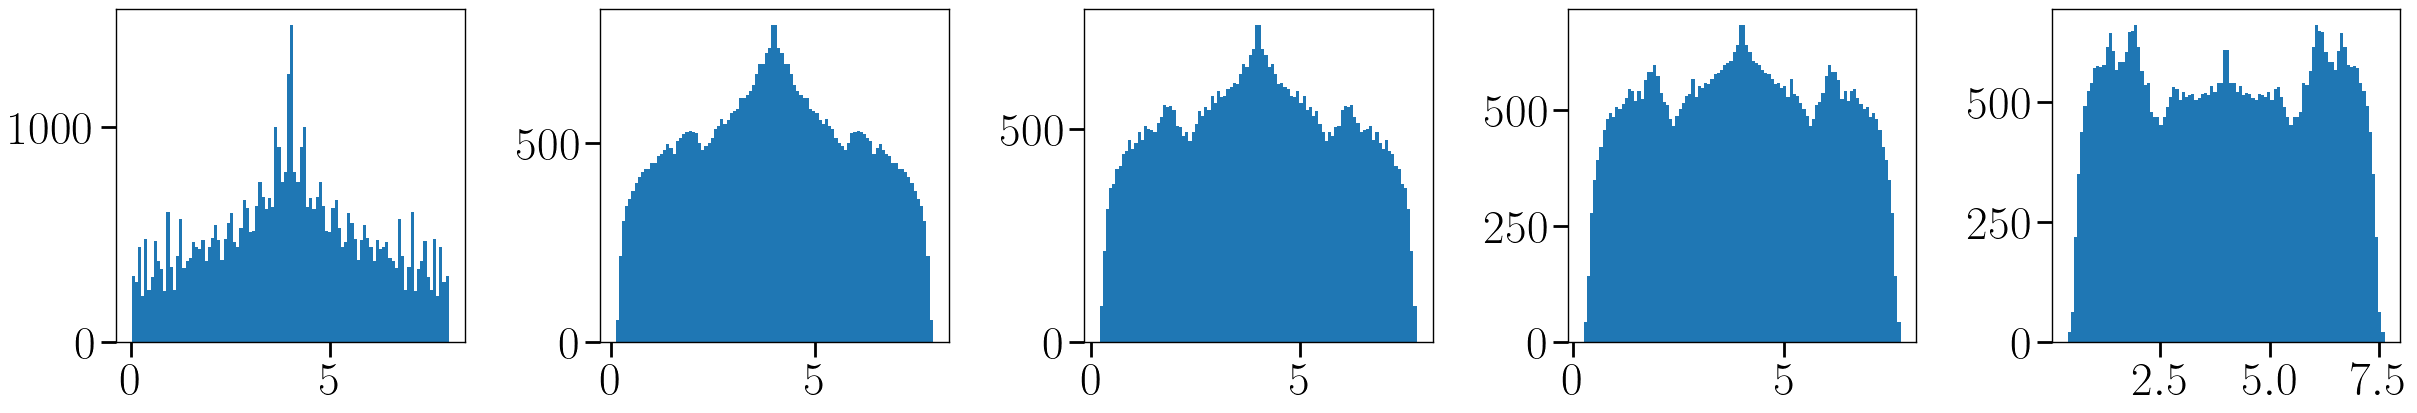

In [7]:
fig, ax = plt.subplots(1, len(pflipList), figsize=(5*len(pflipList), 5))
for i,pflip in enumerate(pflipList):
    ax[i].hist(np.array(eigvlist[pflip]).flatten(), bins=100)
fig.tight_layout()

In [29]:
l = Lattice2D(side, geo=geo, pflip=pflipList[0])
l.flip_random_fract_edges()
l.compute_full_laplacian_spectrum()

In [30]:
np.where((l.eigv > 3.9) & (l.eigv < 4.1))[0]

array([480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492,
       493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505,
       506, 507, 508, 509, 510, 511, 512, 513, 514, 515, 516, 517, 518,
       519, 520, 521, 522, 523, 524, 525, 526, 527, 528, 529, 530, 531,
       532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542, 543])

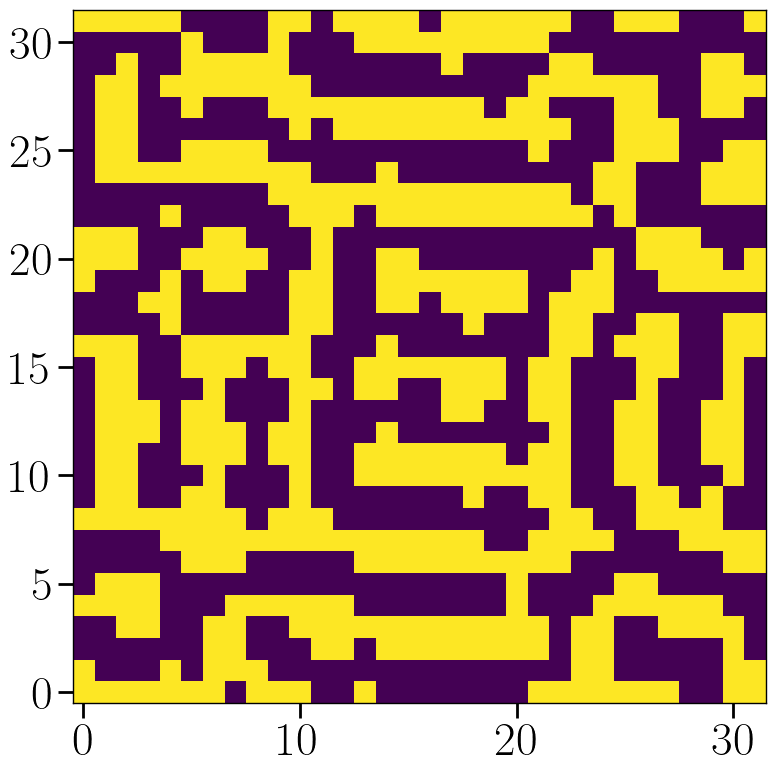

In [36]:
plt.imshow(np.sign(l.eigV[200]).reshape(*l.syshape))

## Miscellanea

### Single errors eigenvector

In [ ]:
sizes = 2**np.arange(3, 5)
verbose = False
#
gcIterProd = product(['squared', 'tri', 'hex'], 
                     ['single', 'singleZERR', 'singleXERR'])
for geometry, cell in gcIterProd:
        conditional_print(f"{geometry}, {cell}...\n\t", verbose, end=' ')
        lattices = {}
        #
        for side in sizes:
            lattices[side] = Lattice2D(#
                side1 = side,
                geo = geometry,
                init_nw_dict = True,
                sgpath='test_data', 
            )
            lattices[side].flip_sel_edges(
                lattices[side].nwDict[cell]['G']
            )
        #
        eigvpath = f"{lattices[side].lrgsgpath}eigV0_{cell}.npy"
        #
        if os.path.exists(eigvpath):
            conditional_print("File already exists.", verbose)
            continue
        else:
            conditional_print("computing... ", verbose)
            lattices[side].compute_k_eigvV()
            with open(eigvpath, 'wb') as f:
                np.save(f, np.abs(lattices[side].eigV))
            conditional_print("done.", verbose)

### No flip Signed Laplacian eigenvectors of a Squared Lattice

In [ ]:
side = 50
geo = 'squared'
pbc = True
Neigv = 10
selEigv = 0
pflip = 0.08

In [ ]:
l = Lattice2D(side, geo=geo, pbc=pbc, pflip=pflip)
l.flip_random_fract_edges()
l.compute_k_eigvV(howmany=Neigv)
eigV = np.sign(l.eigV).reshape(Neigv, side, side)

In [ ]:
fig, ax = plt.subplots(ncols=Neigv, figsize=(Neigv*5, 5))
for i,axi in enumerate(ax):
    axi.imshow(eigV[i], cmap='hot', interpolation=None)